Import libraries

In [1]:
import gym
import minihack

from RiccardoWorkSpace.StrategyLibrary2 import Strategy as Strategy
from JacopoWorkSpace.LibraryJacopo import Map
from SelormWorkSpace.MovingLibrary import Moving

Creation level methods list

In [2]:
def CreateLevel1():

    LenX = 11
    LenY = 11

    new_level = minihack.LevelGenerator(w = 11, h = 11)
    new_level.set_start_pos((5, 5))

    new_level.fill_terrain(type='fillrect',flag='L', x1 = 1, y1 = 1, x2 = 4, y2 = 4)
    new_level.fill_terrain(type='fillrect',flag='L', x1 = 6, y1 = 1, x2 = 9, y2 = 4)
    new_level.fill_terrain(type='fillrect',flag='L', x1 = 1, y1 = 6, x2 = 4, y2 = 9)
    new_level.fill_terrain(type='fillrect',flag='L', x1 = 6, y1 = 6, x2 = 9, y2 = 9)

    new_level.fill_terrain(type='fillrect',flag='.', x1 = 2, y1 = 2, x2 = 8, y2 = 8)

    new_level.add_monster(name='coyote',symbol='d', place=(10, 5))
    
    Enviroment = gym.make("MiniHack-Skill-Custom-v0", des_file = new_level.get_des(), observation_keys=("chars", "pixel"))

    state = Enviroment.reset()

    MapGame = Map(state)
    MapGame.view_map()
    
    return MapGame, Enviroment

Choose level get the map and create joystick

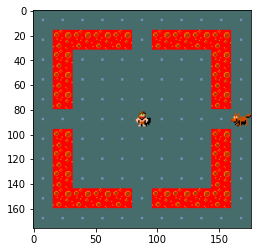

In [3]:
MapGame, Enviroment = CreateLevel1()
Joystick = Moving(Enviroment)

Create joystick, stategy and successor function

In [4]:
def SuccessorFunction(Point):
    
    Result = [(Point[0]-1, Point[1]-1), (Point[0]+1, Point[1]-1),  (Point[0], Point[1]-1),
              (Point[0]-1, Point[1]),   (Point[0]+1, Point[1]),    (Point[0], Point[1]),
              (Point[0]-1, Point[1]+1), (Point[0]+1, Point[1]+1),  (Point[0], Point[1]+1)]
    
    return list(filter(lambda i: MapGame.get_position_symbol(i[0], i[1]) == ".", Result))

StrategyLogic = Strategy(SuccessorFunction)
StrategyLogic.ActualGoal = (8, 39)  #<--------- Target

Go to next step

Actual path choosed: [(10, 39), (9, 38), (8, 39)]
(10, 39) --> (9, 38)


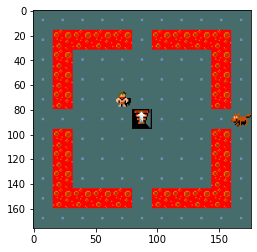

In [5]:
CharacterPosition = MapGame.get_player_location()
MonsterPositions = MapGame.get_monsters_location()

NextStep = StrategyLogic.Calculate(CharacterPosition, MonsterPositions)

print(f"Actual path choosed: {StrategyLogic.GetActualPath()}")

print(f"{CharacterPosition} --> {NextStep}")

NewState = Joystick.Move(CharacterPosition, NextStep)
MapGame = Map(NewState)

MapGame.view_map()